In [1]:
import alpaca_trade_api as tradeapi
import json
import pandas as pd
import numpy as np
from src.trading_bot import trading_bot
from src.market_data import market_data
from time import sleep
import matplotlib.pyplot as plt


In [2]:
debug = True
Trading = True

In [3]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

print(df)

     A   B   C   D
0   52  67  79  67
1   59   1  12  75
2    6  48  71  10
3   47  72  74  33
4   79  77  85  29
5   55  62  54  77
6   71  73  53  20
7   68  37  11  46
8   12  59  66  50
9   70  36  48  43
10  39  20  26  89
11  67  77  74  75
12  39  19  29  34
13  80  99  42  73
14  22  74  39  35
15  54  94  38  15
16  10  29   7  85
17  12  99  10  93
18  89  89  94  34
19  79  28  66  36
20  74  19  24  27
21  34  63  39  89
22  43  95  26  10
23  52  83  52  76
24  88  46  36  48
25   3  52   3  65
26  73  42  71  88
27  94  28  53  18
28  96  61  35  61
29  50  42  58  55
..  ..  ..  ..  ..
70  72  18   5  57
71   8  48  54  85
72  16  34  38  41
73  70  73  43  49
74  90  59  68  12
75  97  62  77  99
76  71  80  42  69
77   7  89  62   6
78  34  75  67  42
79  24  90  19  97
80  61  92  35  98
81  71  24   2  77
82  44   5  43  46
83  37  56  22  13
84  67   2  81   6
85  86   5  45  51
86  43  67  16  89
87  15  22  92  98
88  67   7   9   7
89  31  25  63  13
90  42  15  

In [4]:
getThis = 'A'
OpenData = pd.DataFrame(df[getThis])
print(OpenData)

     A
0   52
1   59
2    6
3   47
4   79
5   55
6   71
7   68
8   12
9   70
10  39
11  67
12  39
13  80
14  22
15  54
16  10
17  12
18  89
19  79
20  74
21  34
22  43
23  52
24  88
25   3
26  73
27  94
28  96
29  50
..  ..
70  72
71   8
72  16
73  70
74  90
75  97
76  71
77   7
78  34
79  24
80  61
81  71
82  44
83  37
84  67
85  86
86  43
87  15
88  67
89  31
90  42
91  94
92  47
93  64
94  59
95  31
96  29
97  13
98  34
99  43

[100 rows x 1 columns]


In [5]:
OpenDataAVG = OpenData.ewm(span=10, adjust=False).mean()
OpenDataAVG25 = OpenData.ewm(span=25, adjust=False).mean()
OpenDataAVG50 = OpenData.ewm(span=50, adjust=False).mean()
#print(OpenDataAVG)

In [6]:
OpenData.insert(loc=1, column = 'AVG10', value = OpenDataAVG)
OpenData.insert(loc=2, column = 'AVG25', value = OpenDataAVG25)
OpenData.insert(loc=3, column = 'AVG50', value = OpenDataAVG50)

In [7]:
print(OpenData)

     A      AVG10      AVG25      AVG50
0   52  52.000000  52.000000  52.000000
1   59  53.272727  52.538462  52.274510
2    6  44.677686  48.958580  50.459823
3   47  45.099925  48.807920  50.324144
4   79  51.263575  51.130388  51.448687
5   55  51.942925  51.428050  51.587954
6   71  55.407848  52.933585  52.349211
7   68  57.697330  54.092540  52.962967
8   12  49.388724  50.854652  51.356577
9   70  53.136229  52.327371  52.087691
10  39  50.566006  51.302189  51.574448
11  67  53.554005  52.509713  52.179372
12  39  50.907822  51.470504  51.662534
13  80  56.197309  53.665081  52.773807
14  22  49.979616  51.229305  51.566991
15  54  50.710595  51.442436  51.662403
16  10  43.308669  48.254556  50.028584
17  12  37.616184  45.465744  48.537267
18  89  46.958696  48.814533  50.124040
19  79  52.784387  51.136492  51.256431
20  74  56.641771  52.895223  52.148336
21  34  52.525086  51.441745  51.436636
22  43  50.793252  50.792380  51.105788
23  52  51.012661  50.885273  51.140855


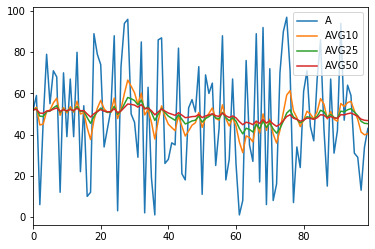

In [8]:
ax = OpenData.plot(label='df1')